# **Preparation**

In [ ]:
# Import library untuk kelola file
import zipfile, os, shutil, random

# Import library untuk proses masking gambar
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

# **Data Wrangling**

## **Data Gathering**

In [ ]:
# Upload file token kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farrelpaksiaditya","key":"ad1103ea5fadafaec1ea15b74ec95f26"}'}

In [ ]:
# Set up API kaggle dan load datasetnya
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

# Ekstrak
!unzip -q cell-images-for-detecting-malaria.zip

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 98% 664M/675M [00:01<00:00, 258MB/s]
100% 675M/675M [00:01<00:00, 363MB/s]


# **Mask Processing**

## **Masking Image**

In [ ]:
input_dir = "/content/cell_images/Parasitized"
output_dir = "/content/generated_masks"
os.makedirs(output_dir, exist_ok=True)

def generate_mask_from_purple(img_path):
    img = np.array(Image.open(img_path).convert("RGB"))
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_purple = np.array([100, 20, 20])
    upper_purple = np.array([170, 255, 255])
    mask = cv2.inRange(hsv, lower_purple, upper_purple)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=1)
    mask = cv2.dilate(mask, np.ones((3, 3), np.uint8), iterations=2)
    return mask

# PROSES hanya 1000 gambar
image_files = sorted(os.listdir(input_dir))[:1000]

for fname in tqdm(image_files, desc="Masking Images"):
    img_path = os.path.join(input_dir, fname)
    try:
        mask = generate_mask_from_purple(img_path)
        cv2.imwrite(os.path.join(output_dir, fname), mask)
    except:
        print(f"Error memproses: {fname}")

Masking Images: 100%|██████████| 1000/1000 [00:01<00:00, 717.60it/s]


# **Cek Hasil Masking**

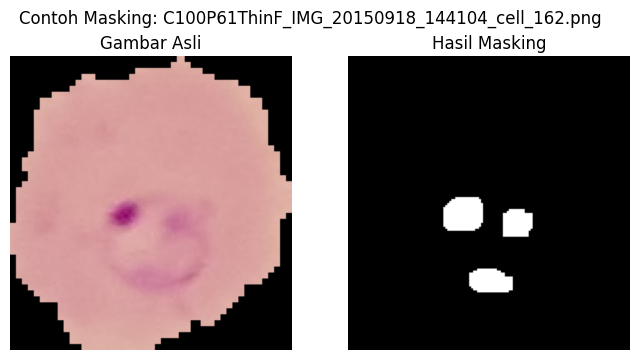

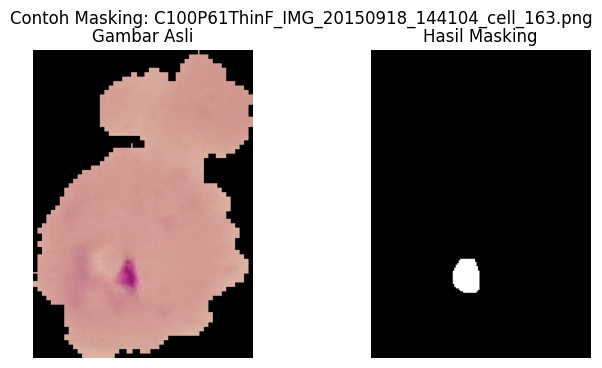

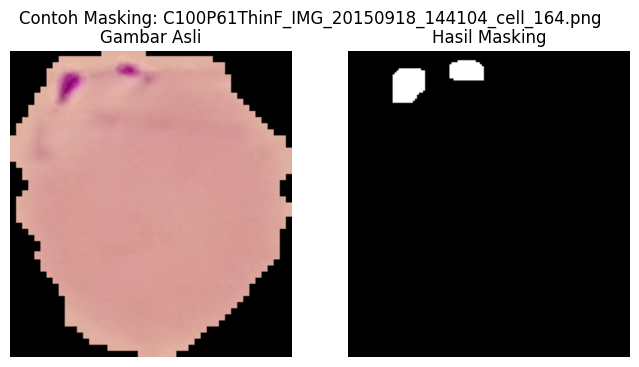

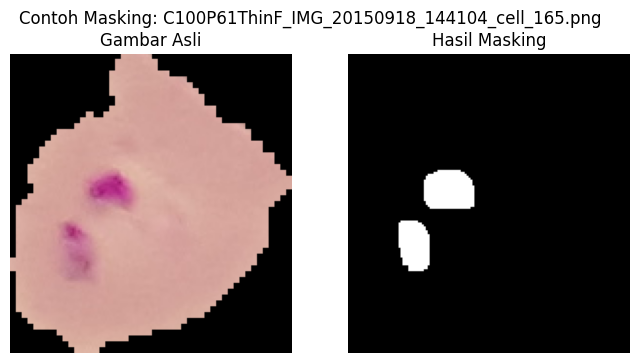

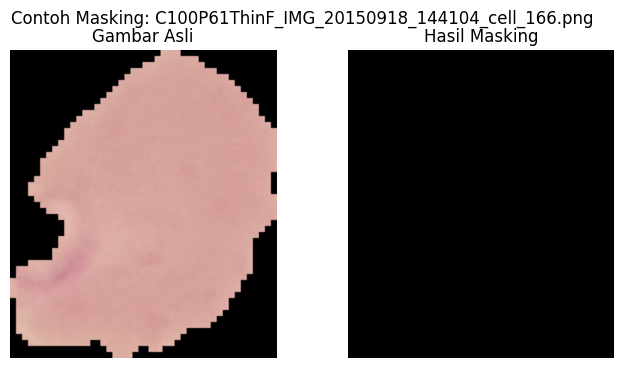

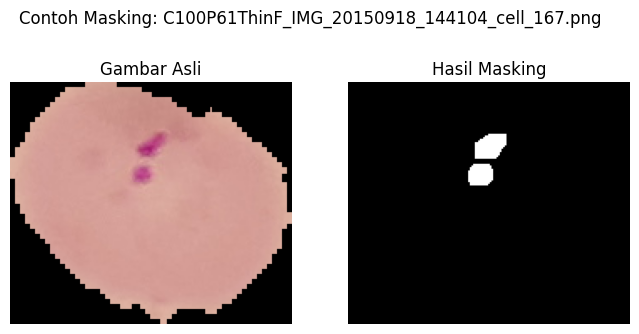

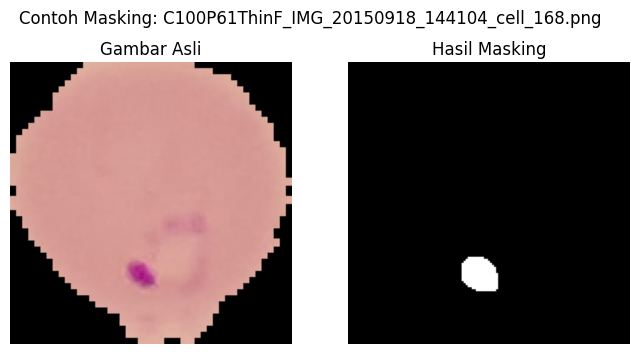

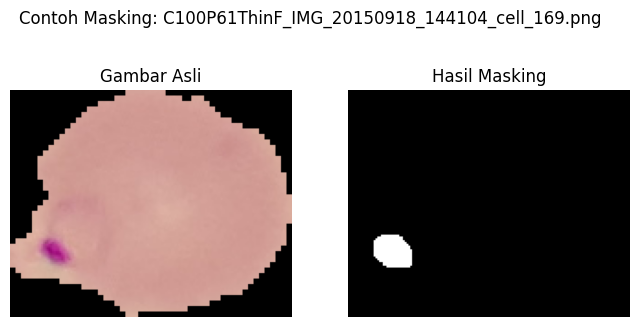

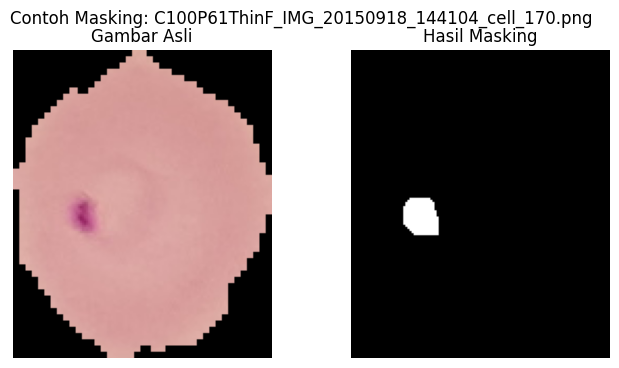

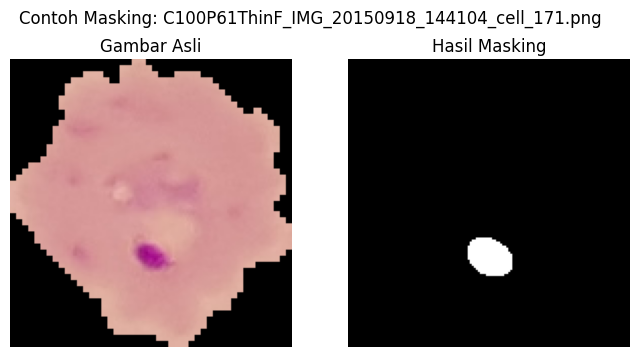

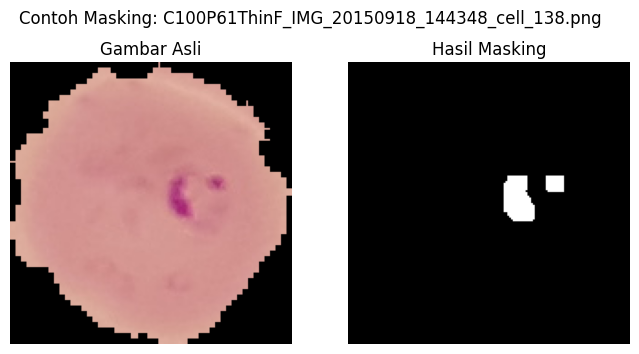

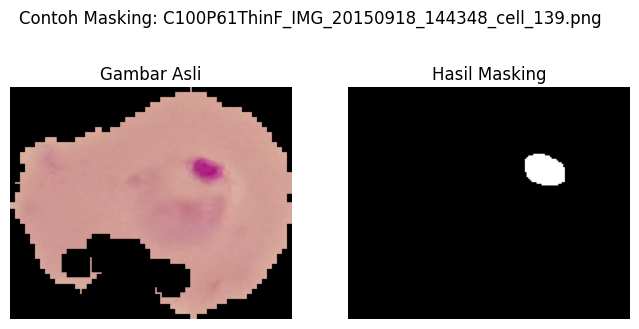

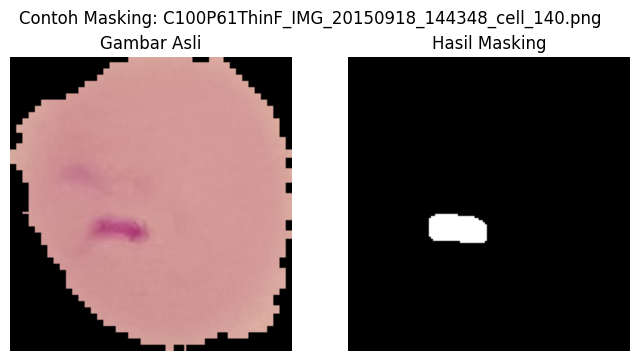

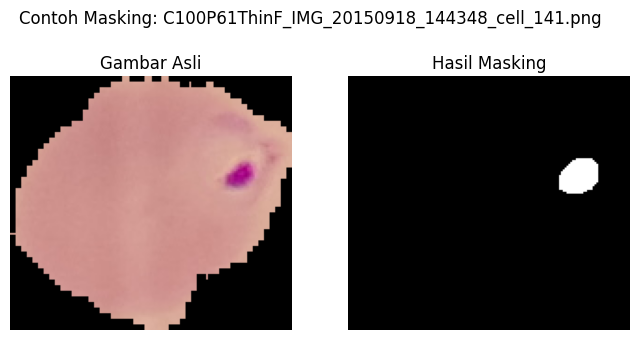

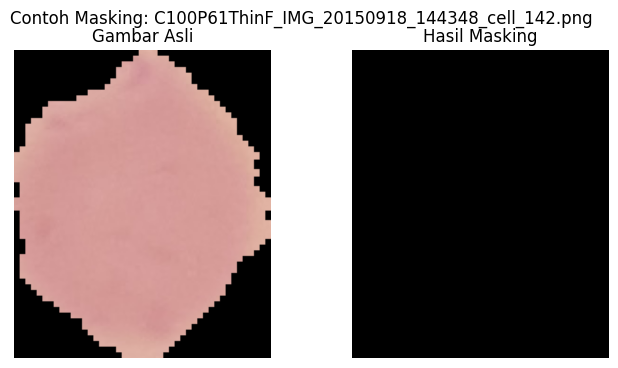

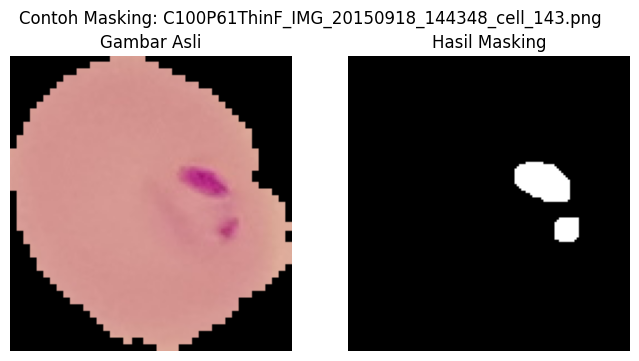

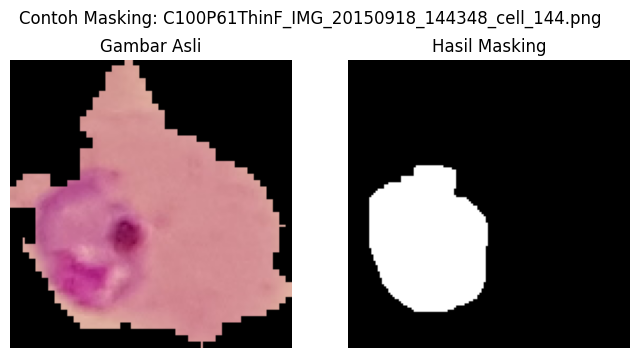

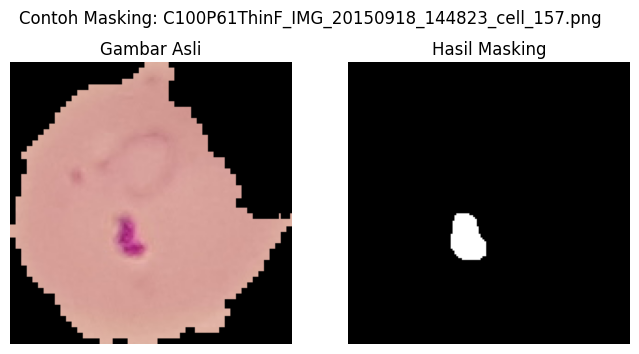

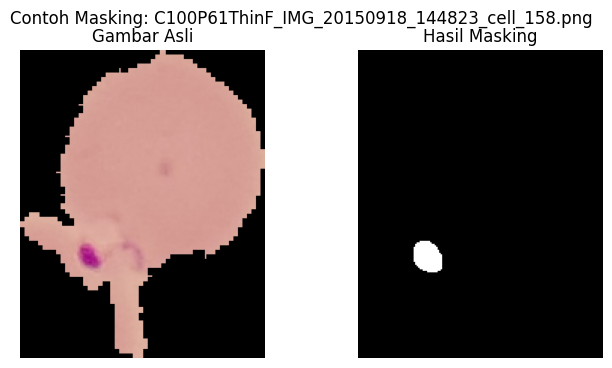

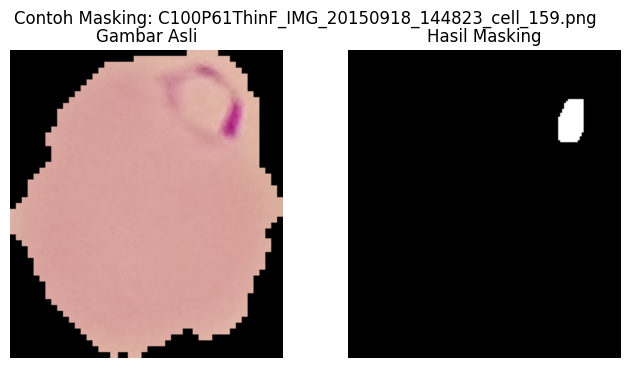

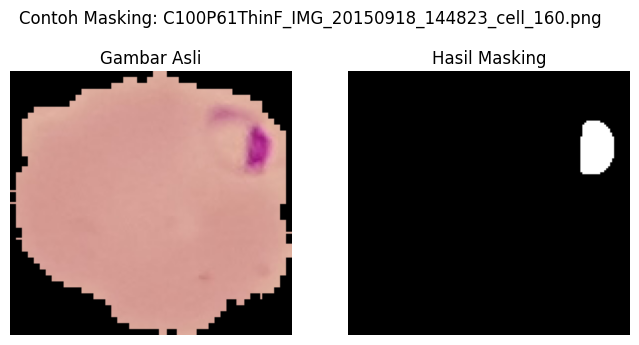

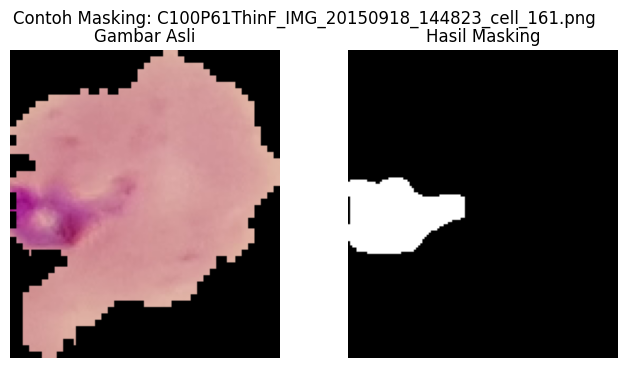

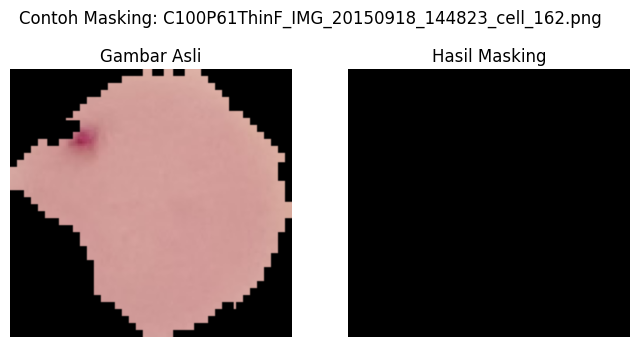

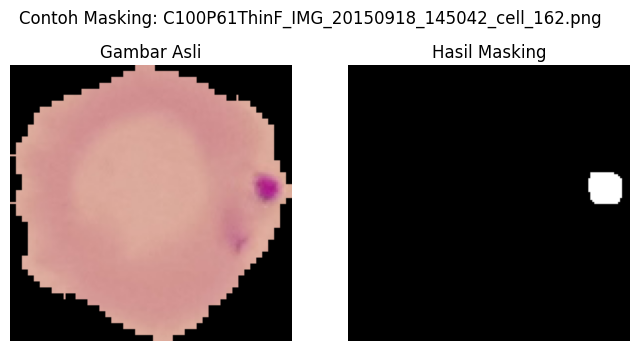

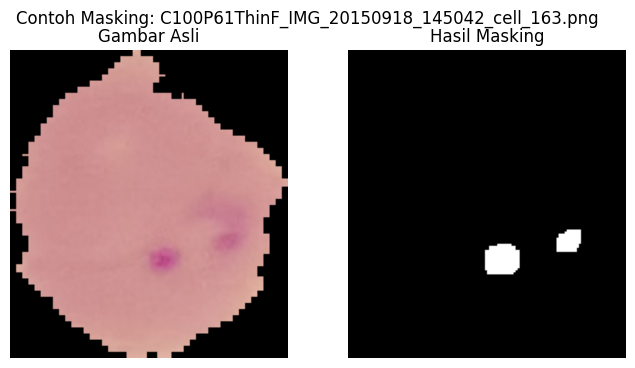

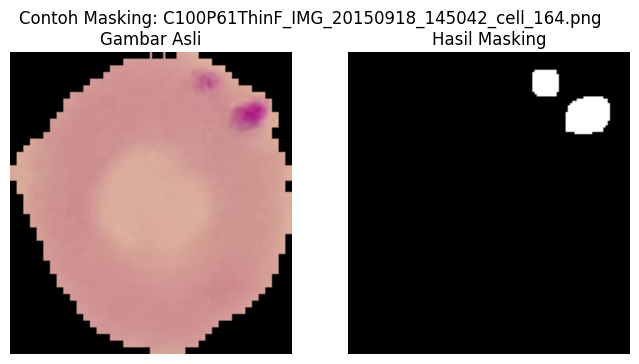

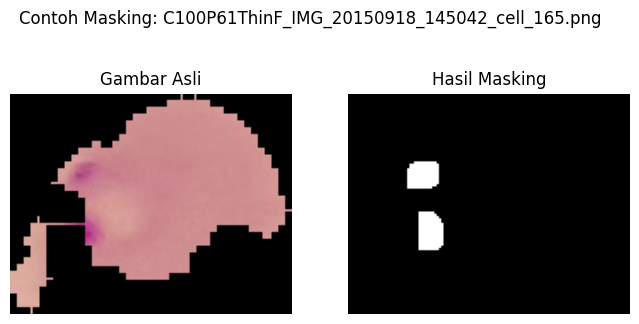

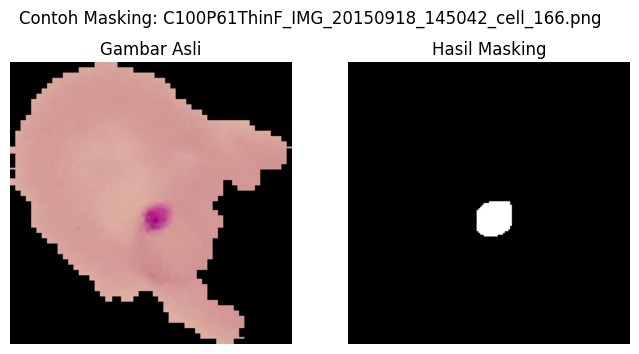

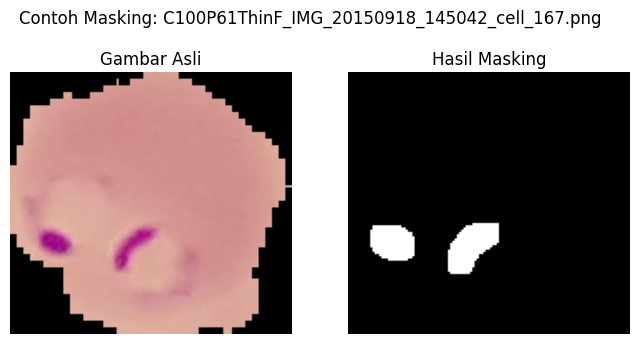

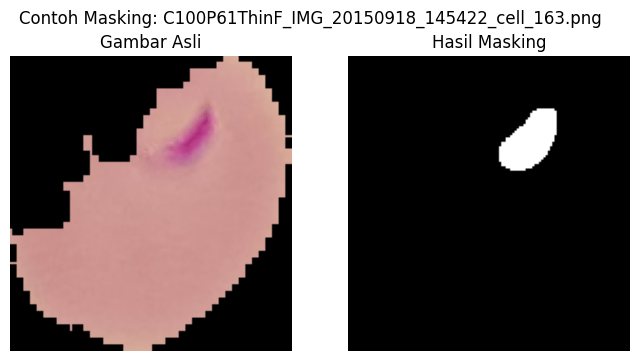

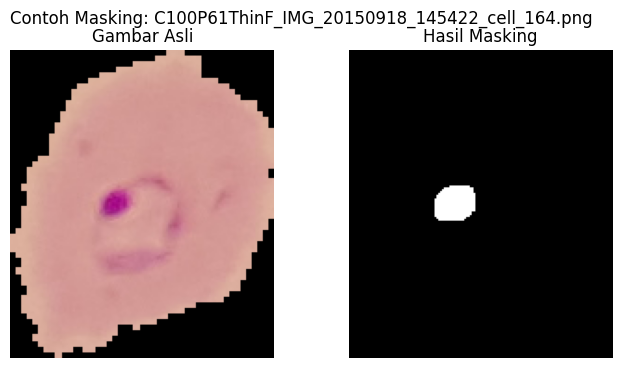

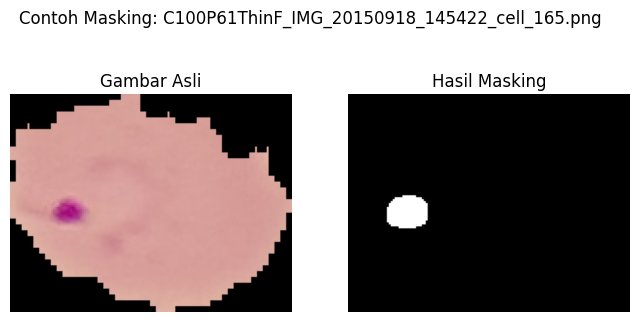

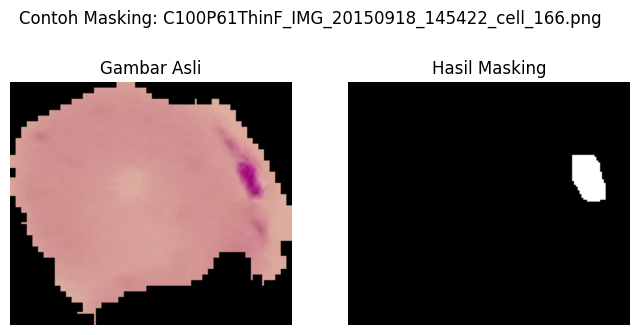

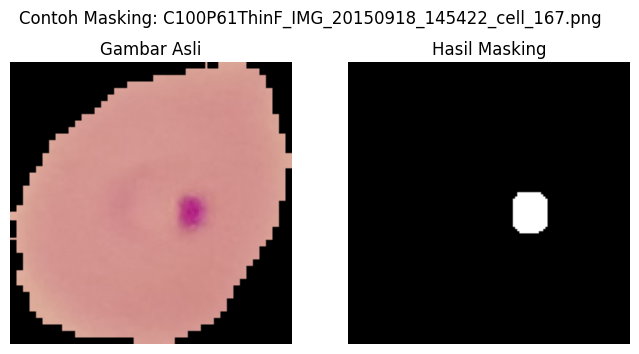

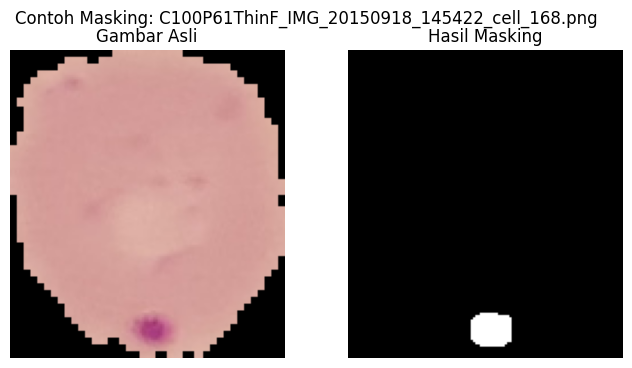

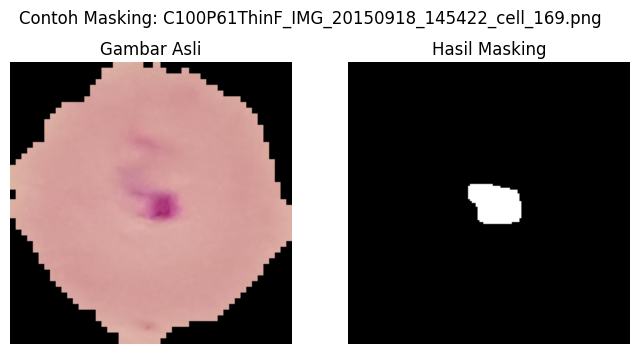

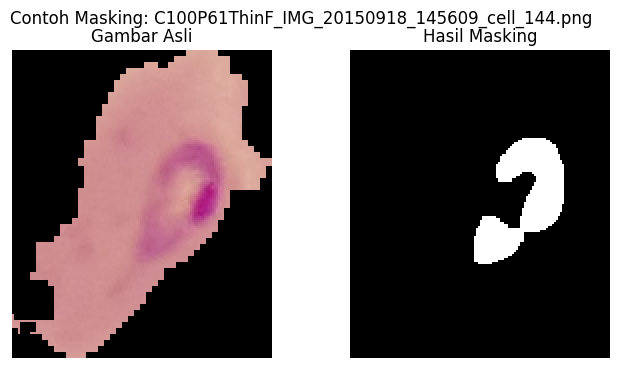

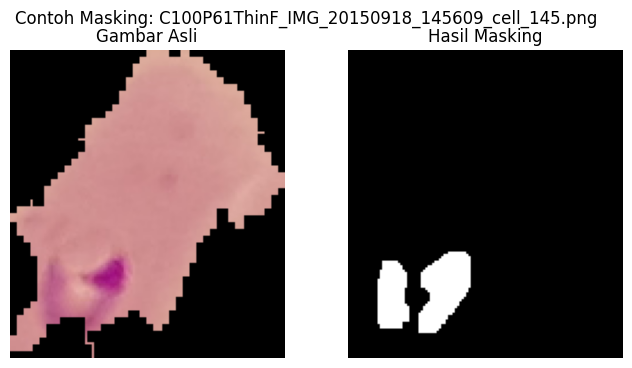

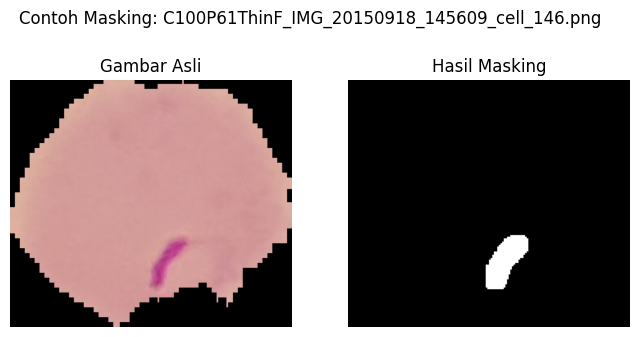

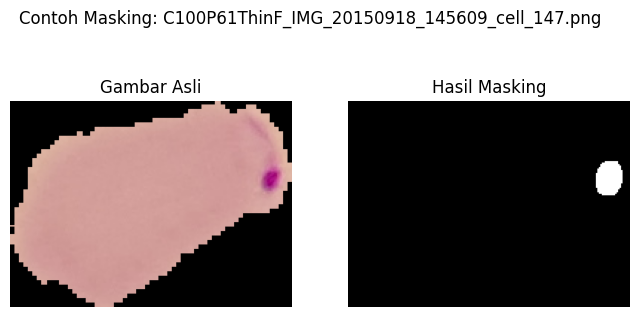

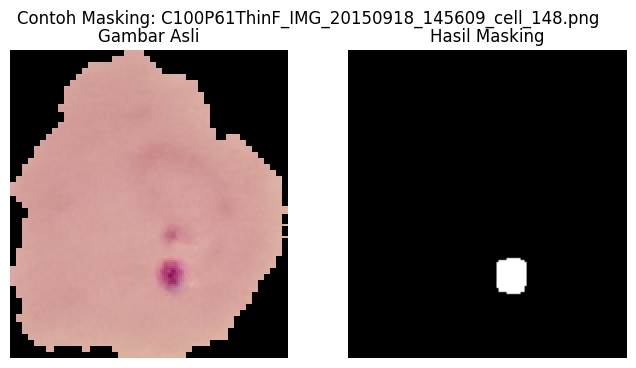

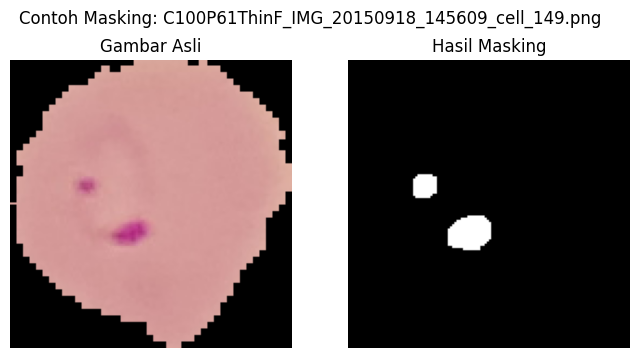

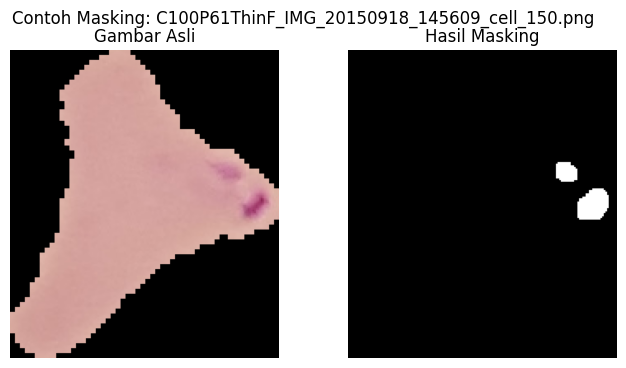

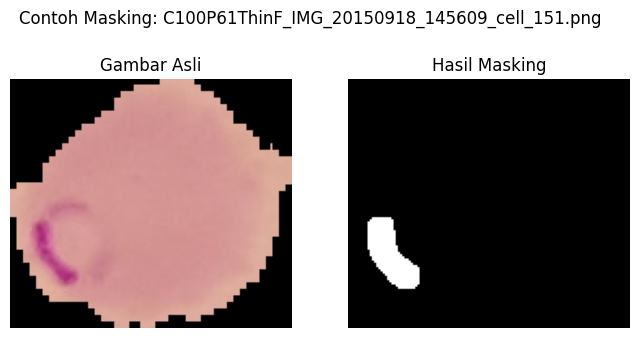

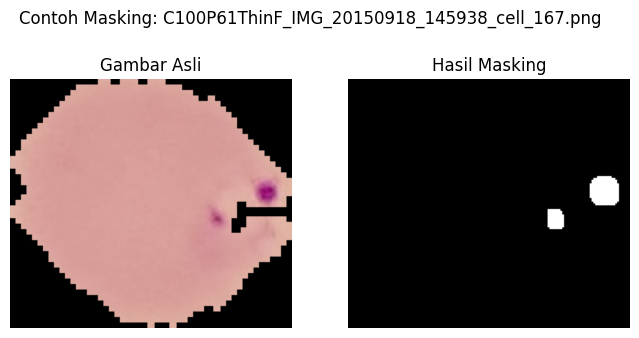

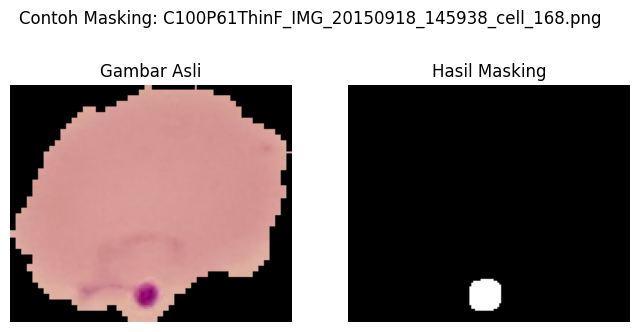

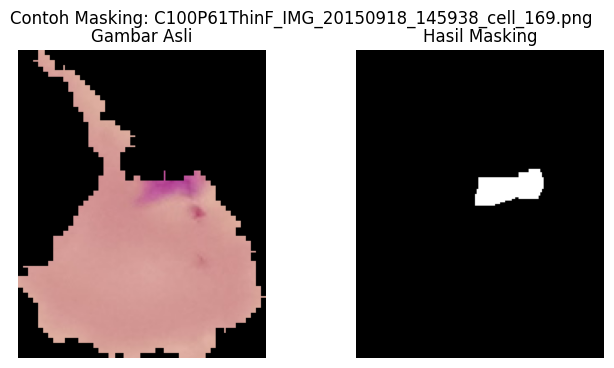

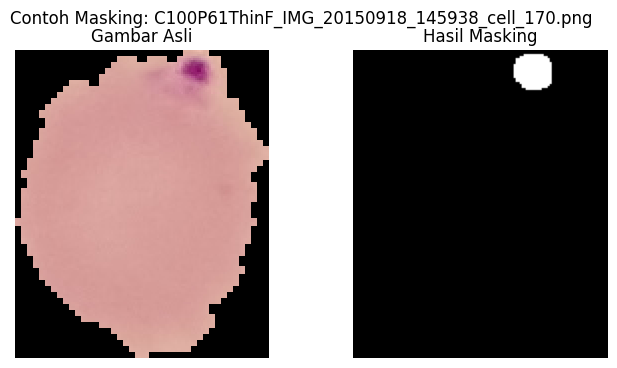

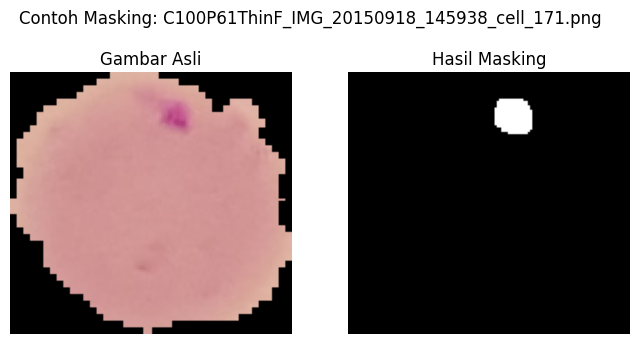

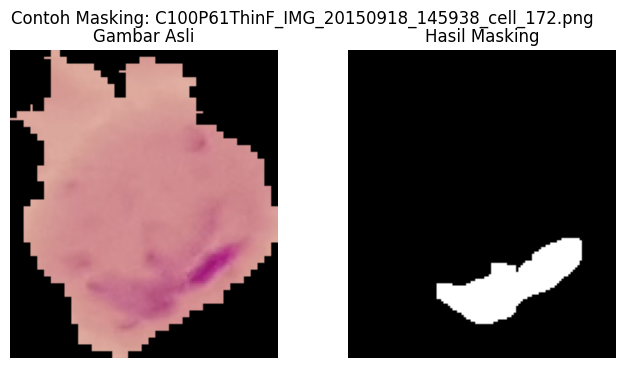

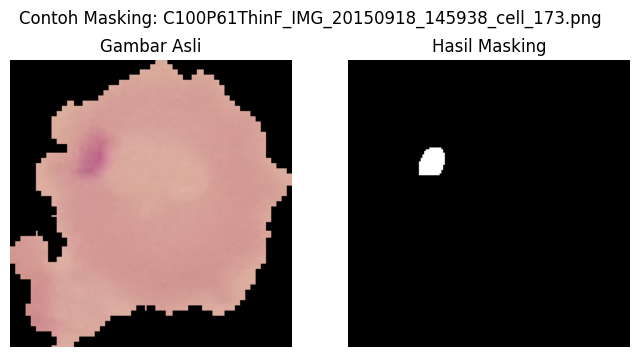

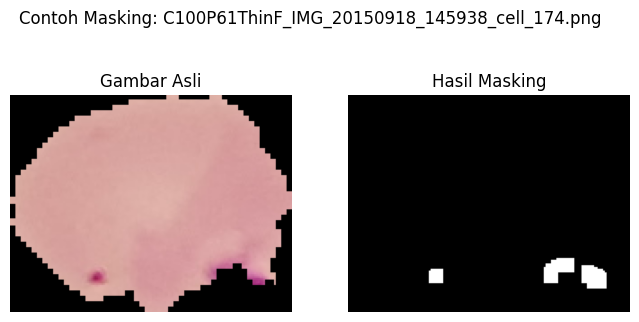

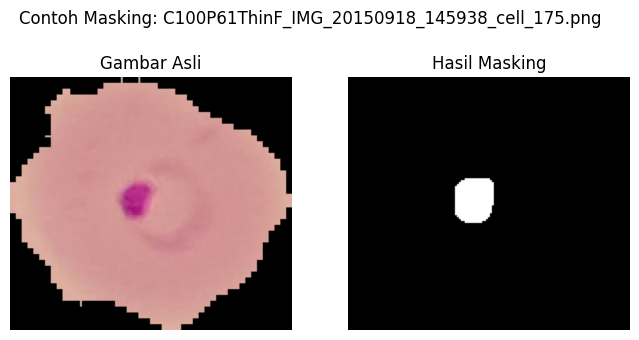

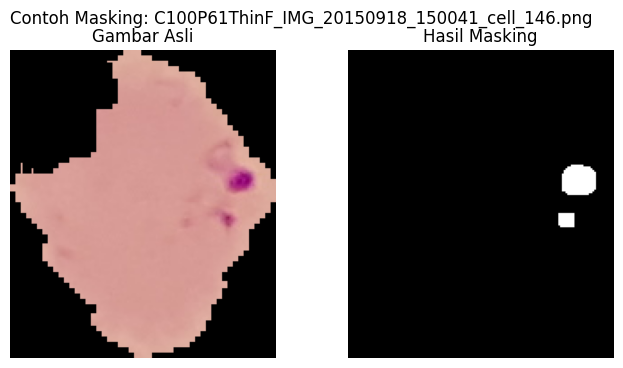

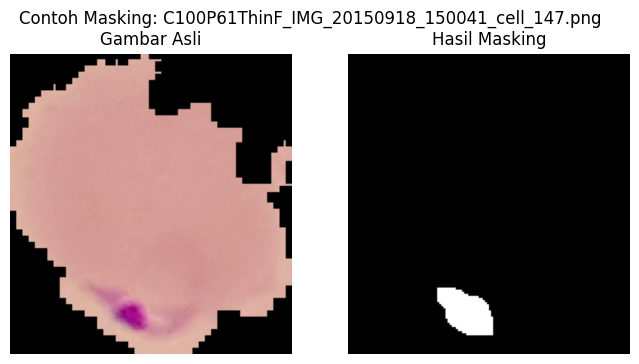

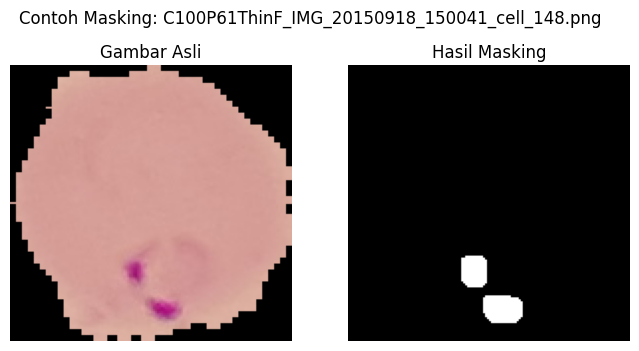

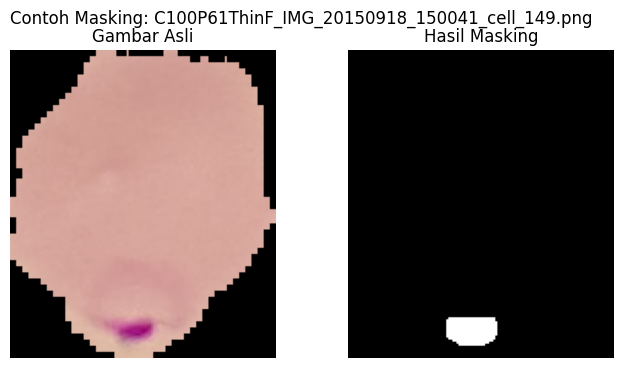

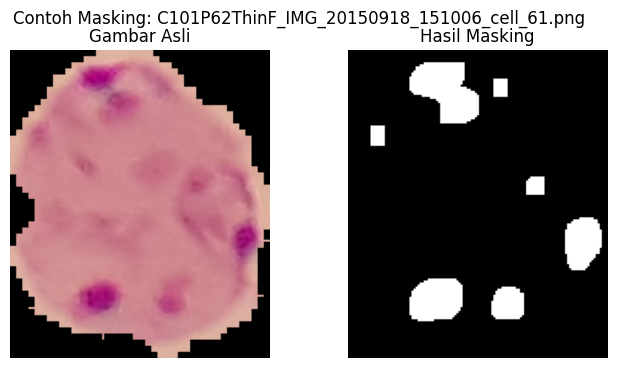

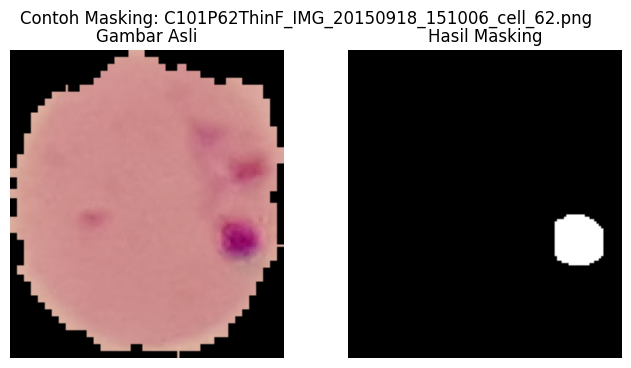

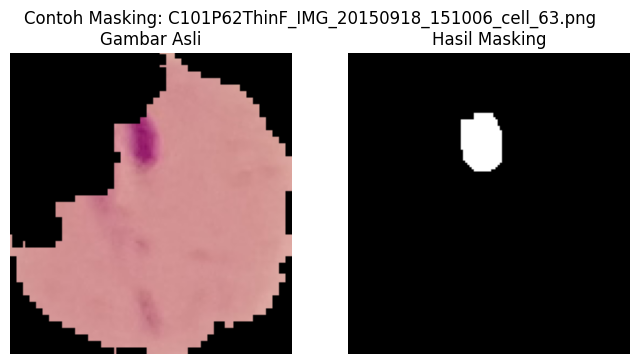

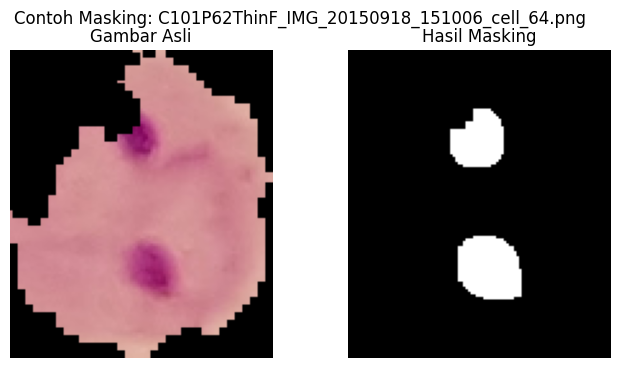

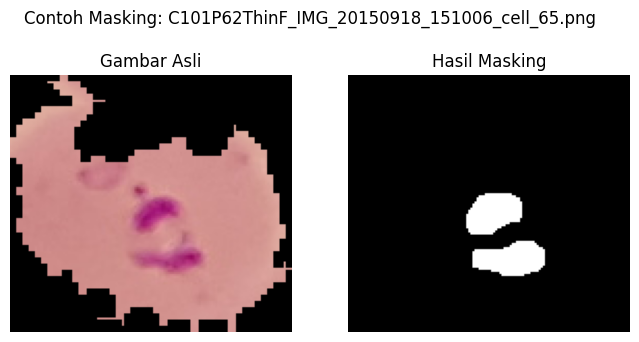

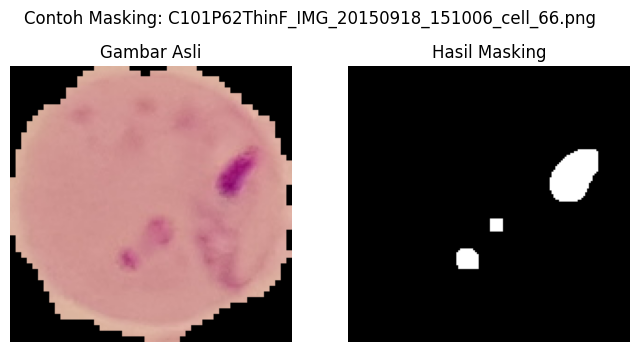

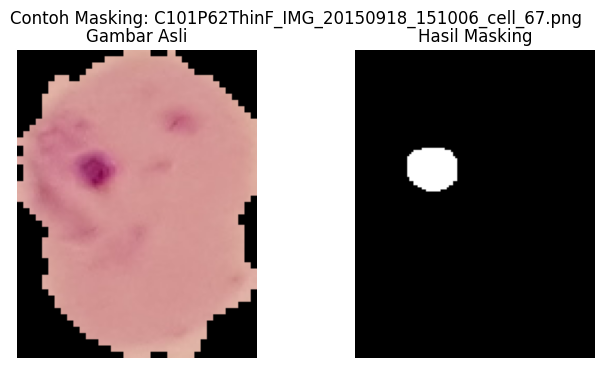

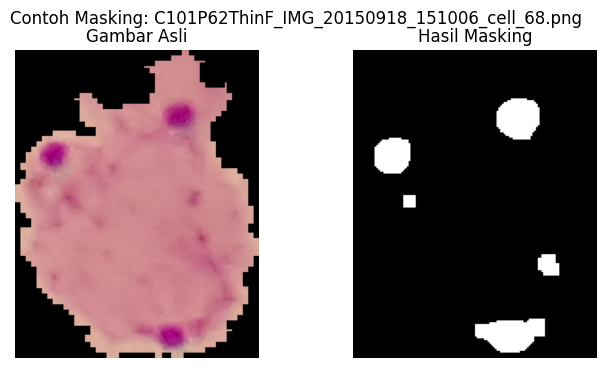

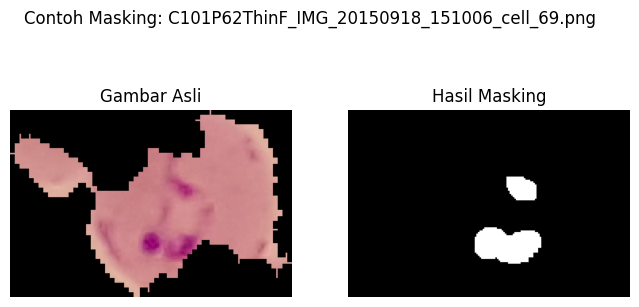

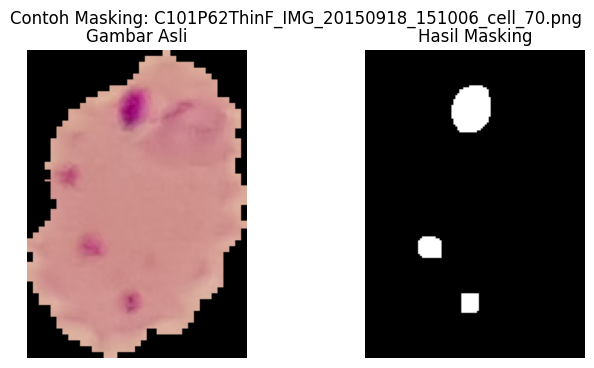

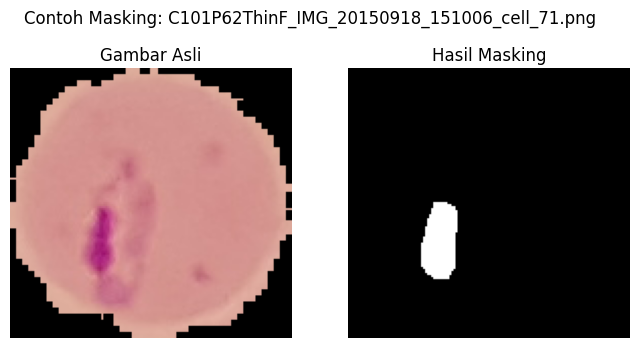

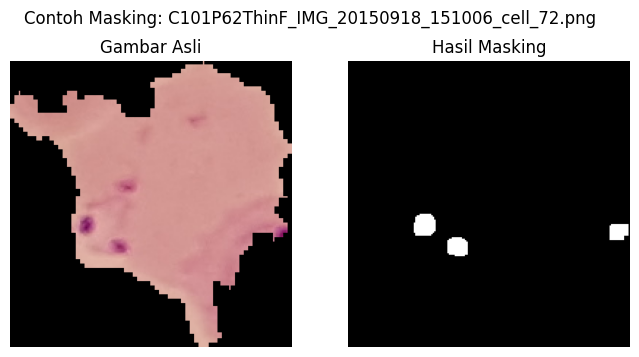

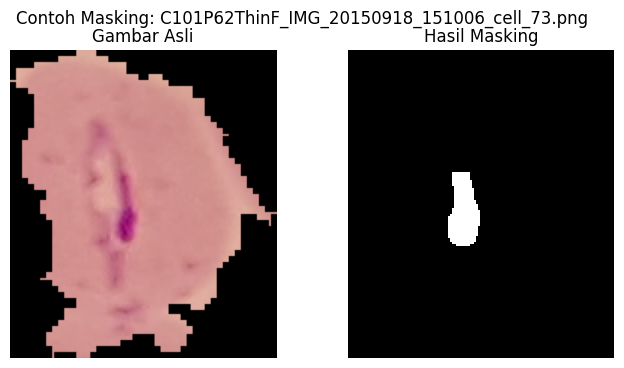

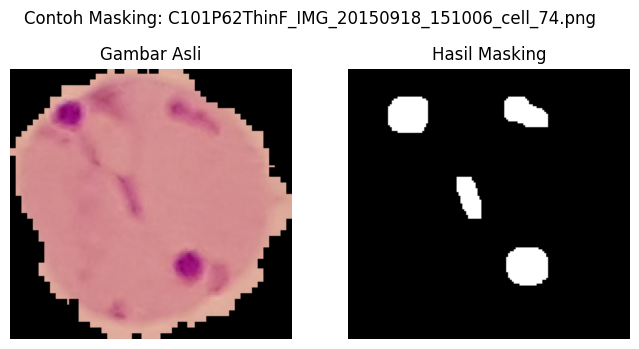

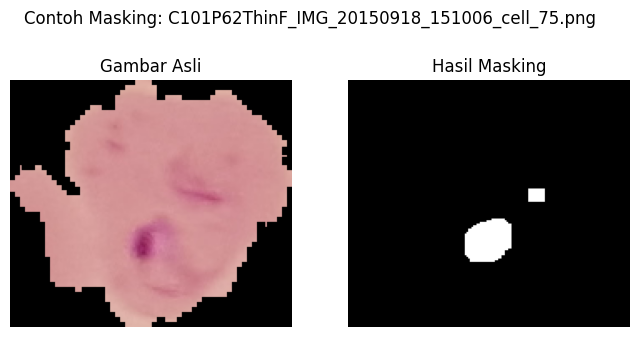

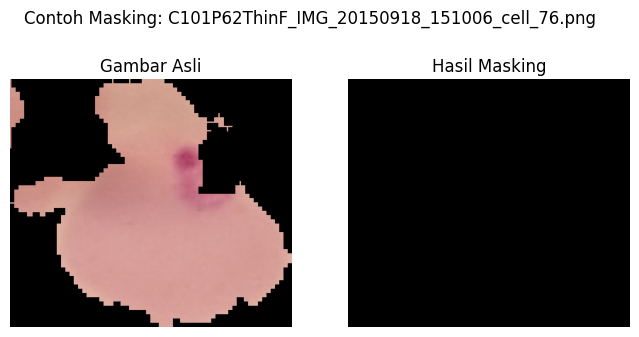

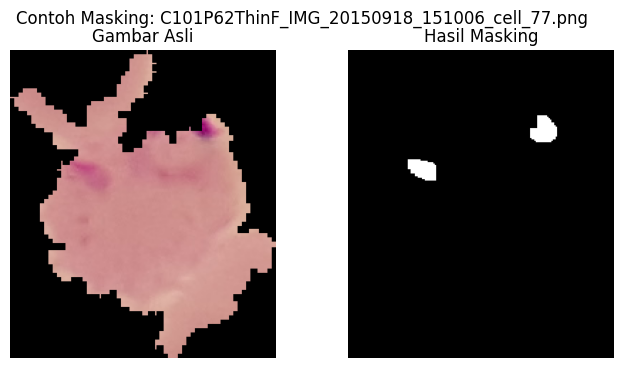

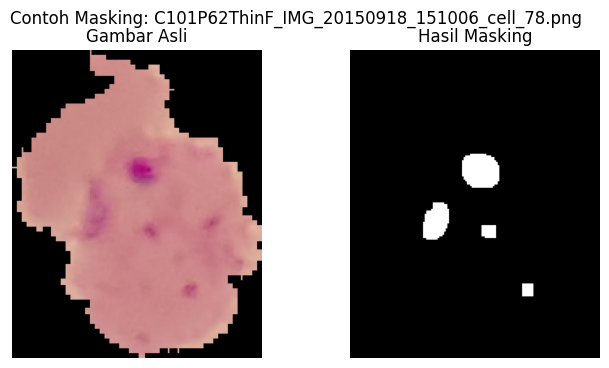

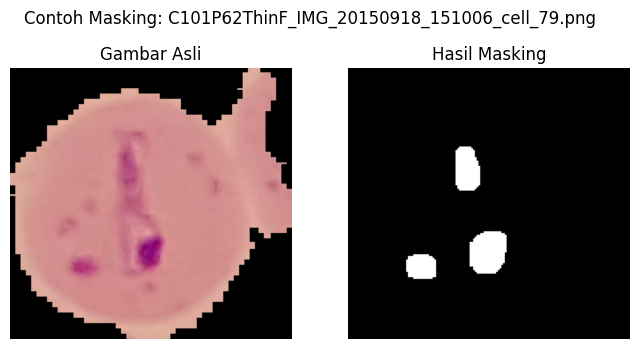

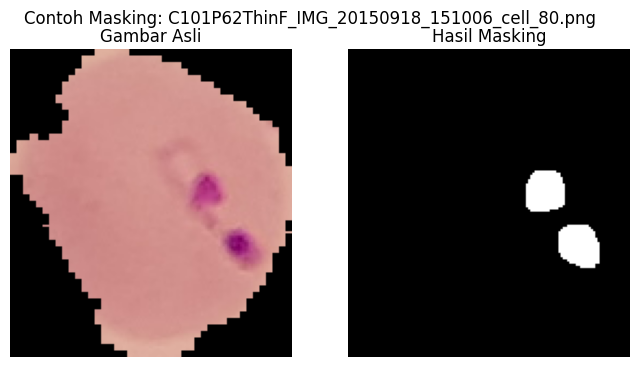

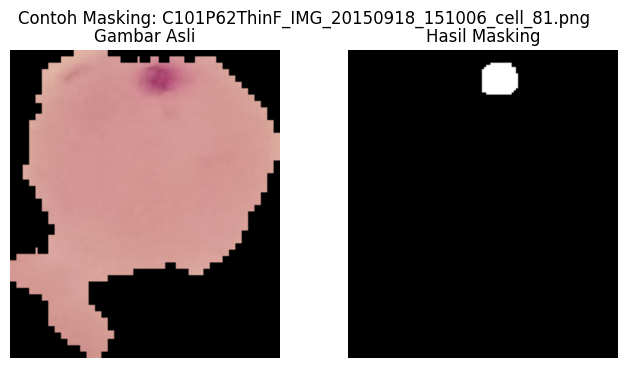

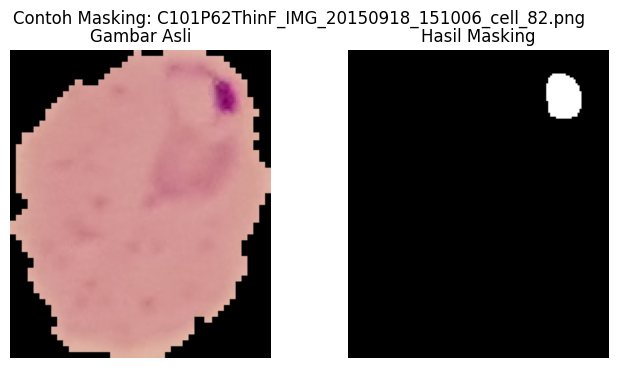

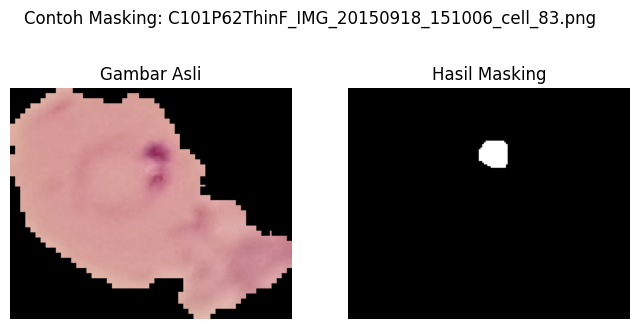

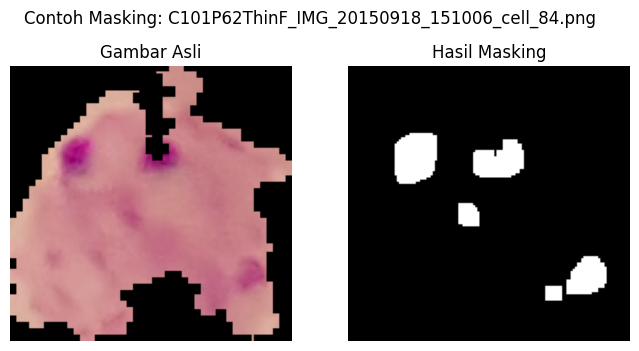

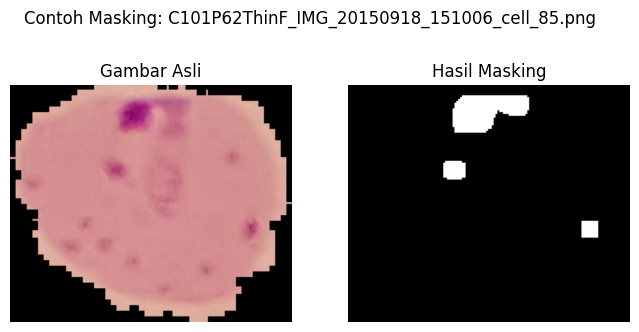

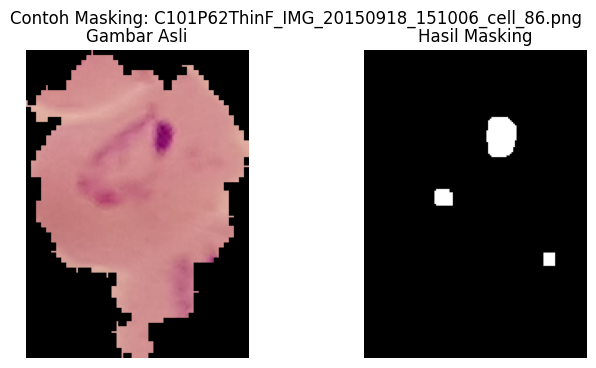

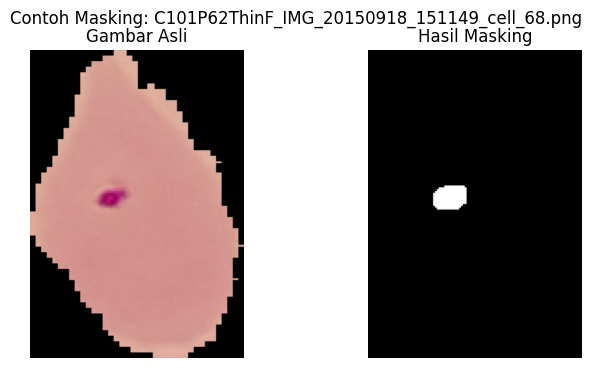

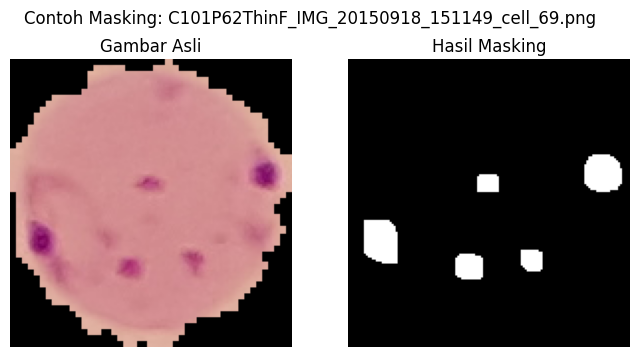

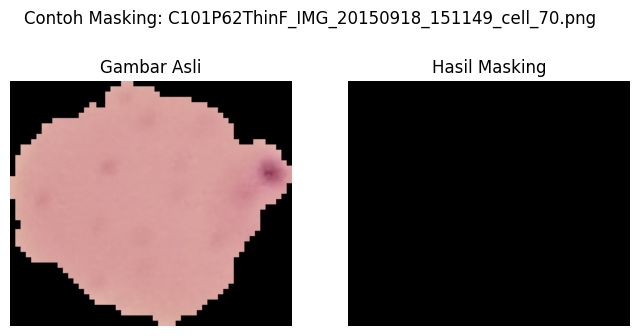

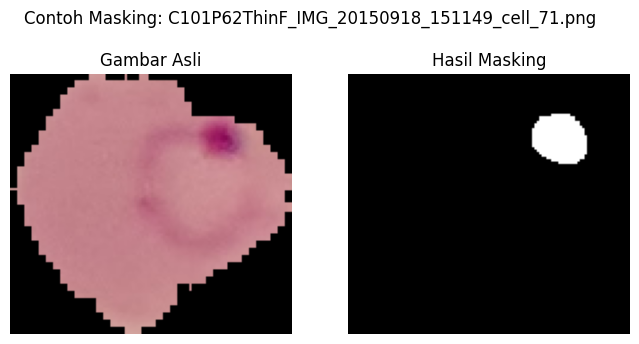

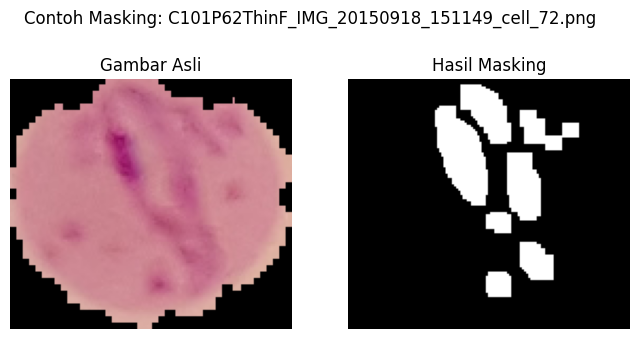

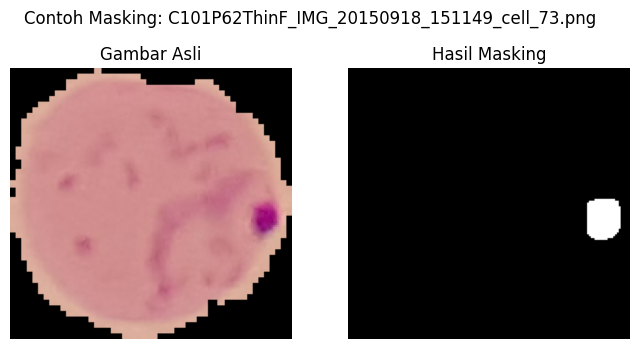

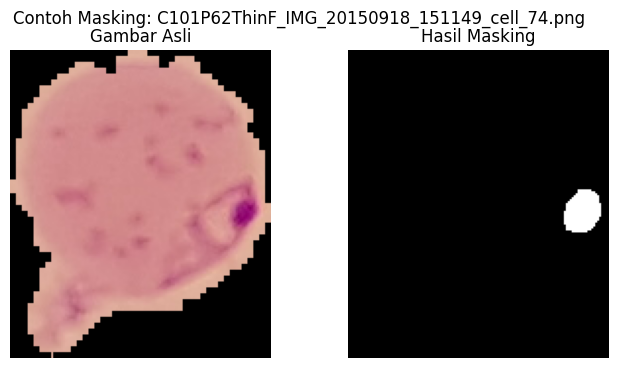

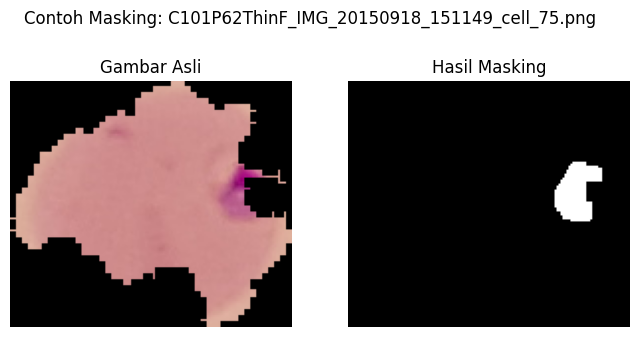

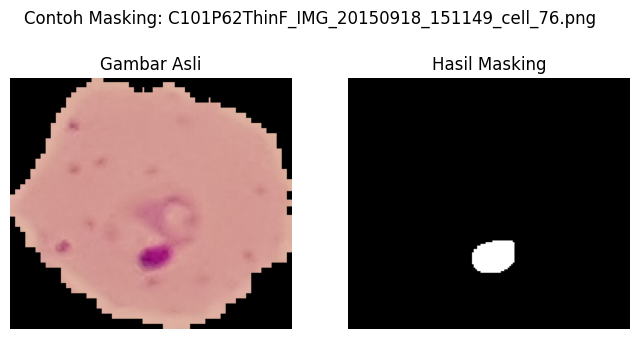

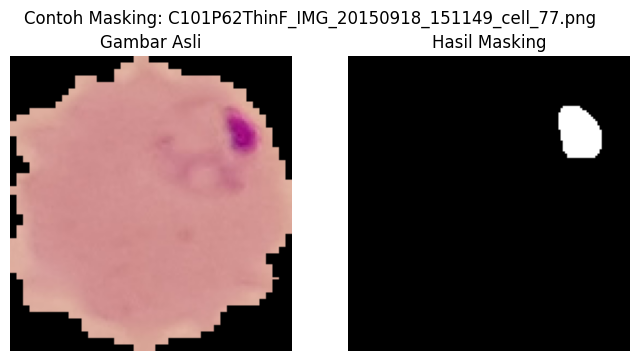

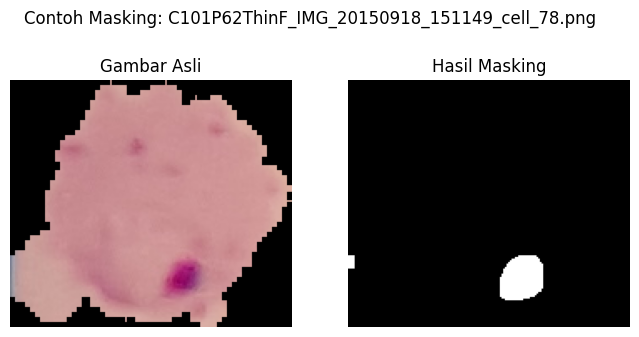

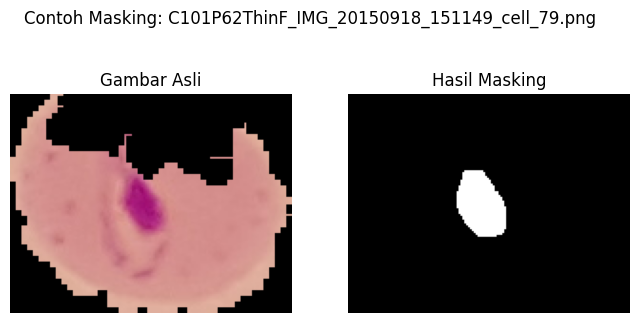

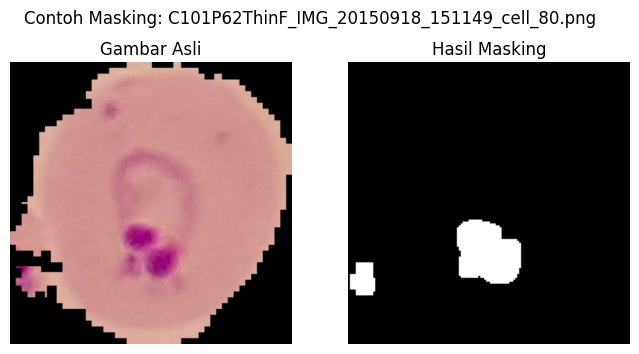

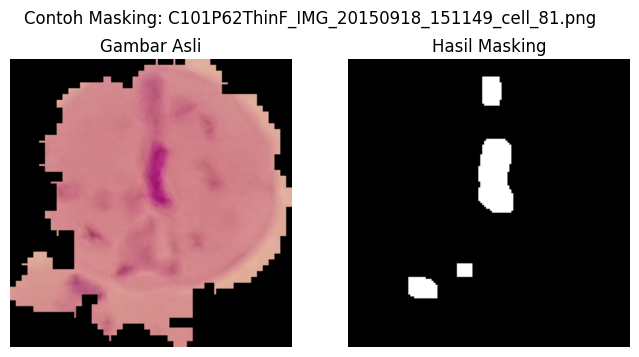

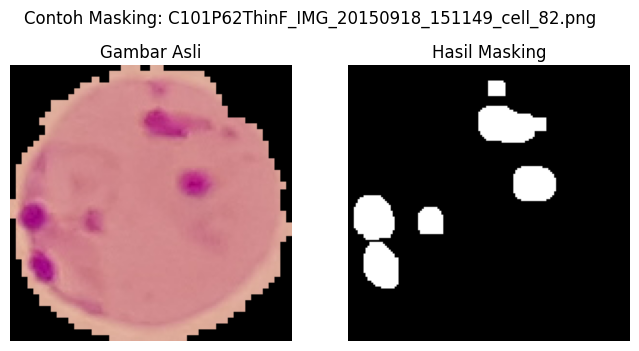

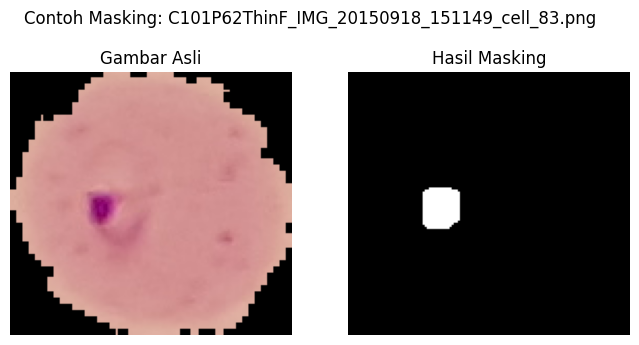

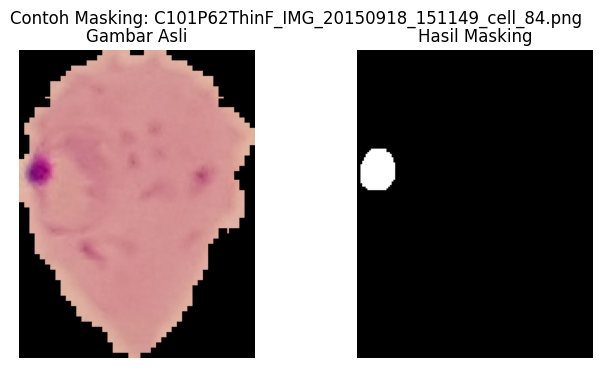

In [ ]:
# Menampilkan contoh gambar + mask hasil masking
sample_images = sorted(os.listdir(input_dir))[:100]

for fname in sample_images:
    # Path gambar asli dan mask
    img_path = os.path.join(input_dir, fname)
    mask_path = os.path.join(output_dir, fname)

    # Load gambar asli dan mask
    original = np.array(Image.open(img_path).convert("RGB"))
    if os.path.exists(mask_path):
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    else:
        print(f"Mask tidak ditemukan untuk: {fname}")
        continue

    # Plot
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Gambar Asli")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Hasil Masking")
    plt.axis("off")

    plt.suptitle(f"Contoh Masking: {fname}", fontsize=12)
    plt.show()

## **Compress to Zip File**

In [ ]:
zip_path = "/content/masks_parasitized.zip"

with zipfile.ZipFile(zip_path, 'w') as zipf:
    for fname in os.listdir(output_dir):
        file_path = os.path.join(output_dir, fname)
        zipf.write(file_path, arcname=fname)

print(f"File masking disimpan dalam: {zip_path}")


File masking disimpan dalam: /content/masks_parasitized.zip


## **Download File Masking**

In [ ]:
from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Hapus Folder Masking**

In [ ]:
# Hapus folder hasil masking jika terdapat kesalahan
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
    print(f"Folder masking dihapus: {output_dir}")
else:
    print(f"Folder masking tidak ditemukan: {output_dir}")

Folder masking dihapus: /content/generated_masks
